## Подготовка данных

In [3]:
!pip install scanf

In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib

In [ ]:
import pandas as pd
import numpy as np
import data_handler as dh
import model as md
import time
import matplotlib.pyplot as plt
from matplotlib import rc
import pickle

In [6]:
import importlib
importlib.reload(dh)
importlib.reload(md)

<module 'model' from '/content/model.py'>

In [7]:
import numba
numba.__version__

'0.51.2'

In [8]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)
from platform import python_version
print('python', python_version())
print('numpy', np.__version__)
print('pandas', pd.__version__)
import graph_tool
print('graph_tool', graph_tool.__version__)

/usr/bin/python3
3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
sys.version_info(major=3, minor=7, micro=12, releaselevel='final', serial=0)
python 3.7.12
numpy 1.19.5
pandas 1.1.5
graph_tool 2.43 (commit 9d41331e, Wed Jul 7 15:32:52 2021 +0200)


# Модель Бэкмана

parameter $\mu = 0.25$

Для получения социального оптимума в моделях бэкмана и стабильной динамики вводятся штрафы на рёбра графов потока. Общей формулой полечния этих штрафов является: </br>
t_fined = t + ft' <br>
Для Модели бэкмана это будет: </br>
t_fined = t_free_flow*(1+(mu+1) * rho * (f/capacity)^(1/mu)/mu) <br>
Для стабильной динамики: <br>
t_fined = t + (t - t_free_flow) </br></br>

Расчёты с моделью стабильной динамикой приведены в файлы Modified_Stable_Dynamics_Experiments.ipynb

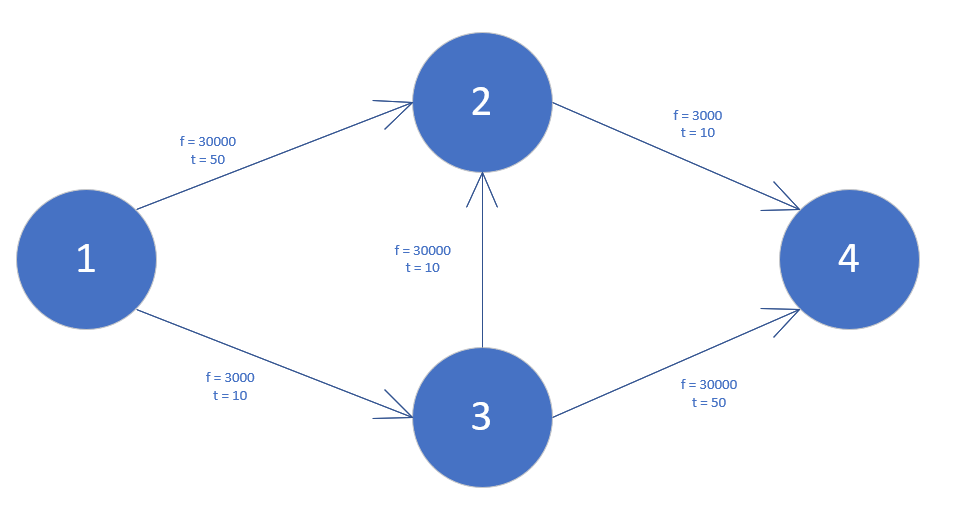

### и её запись в графе

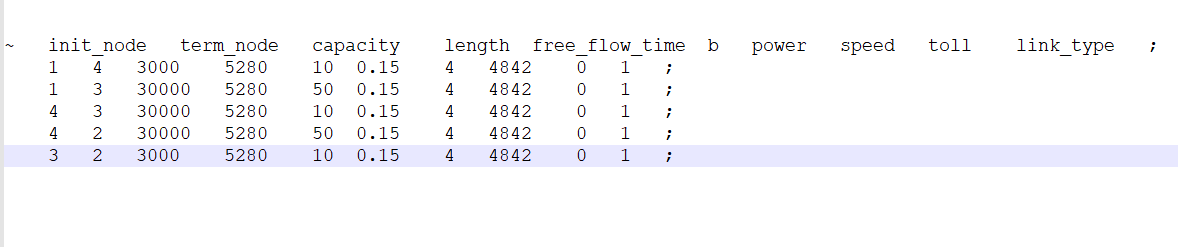

In [9]:
beckmann_save = 'beckmann_results/'

In [47]:
#net_name = 'Anaheim_net.tntp'
#trips_name = 'Anaheim_trips.tntp'
net_name = 'graphs2.tntp'
trips_name = 'trips2.tntp'

handler = dh.DataHandler()
graph_data = handler.GetGraphData(net_name, columns = ['init_node', 'term_node', 'capacity', 'free_flow_time'])
graph_correspondences, total_od_flow = handler.GetGraphCorrespondences(trips_name)

model = md.Model(graph_data, graph_correspondences, 
                    total_od_flow, mu = 0.25, rho = 0.15)

graph_data['graph_table'].head()

,init_node,init_node_thru,term_node,term_node_thru,capacity,free_flow_time
0,1,False,117,True,9000.0,1.090458
1,2,False,87,True,9000.0,1.090458
2,3,False,74,True,9000.0,1.090458
3,4,False,233,True,9000.0,1.090458
4,5,False,165,True,9000.0,1.090458


### С этого момента проводятся расчёты модели на разных численных методах, приведём здесь некоторую аналитику из них

## Модель бэкмана
Массивы flows и times приведены для ребёр в том порядке, в каком записаны в графе.
flows - распределение нагрузок по рёбрам
times - время (включая штрафное) за которое ребро преодолевается
zone travel times - время (включая штрафное) которое тратят члены соответствующих корреспонеднций

Результаты для распределения со штрафами

In [51]:
print(result['flows'])
print(result['times'])
print(result['zone travel times'])

[4242.52050795 1757.47949205 2484.55362464 1757.96688331 4242.03311669]
[39.98608681 50.00044206 10.00035269 50.00044206 39.98612449]
{(1, 2): 89.97256398315093}


Результаты для распределения без штрафов

In [47]:
print(result['flows'])
print(result['times'])
print(result['zone travel times'])

[6000.   -0. 6000.   -0. 6000.]
[34.     50.     10.0024 50.     34.    ]
{(1, 2): 78.00239999999998}


## Стабильная динамика

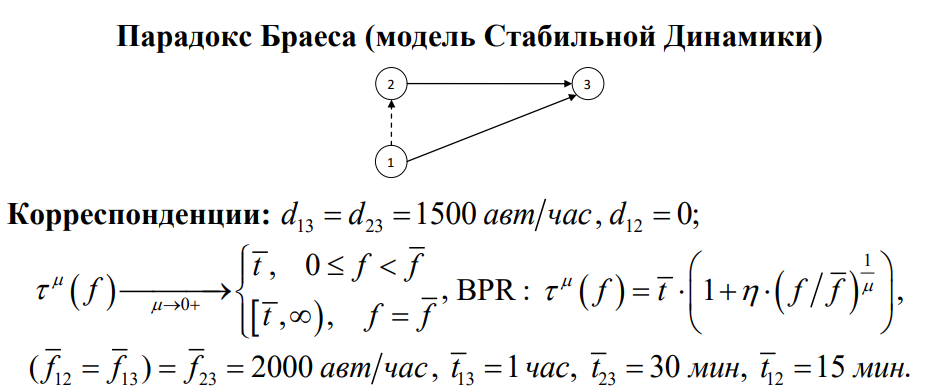

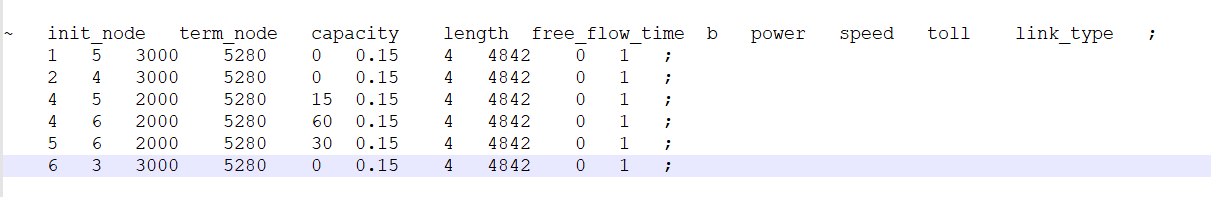

Результаты для распределения со штрафами

In [10]:
print(result['flows'])
print(result['times'])
print(result['zone travel times'])

[1500.         1500.          414.31052895 1085.68947105 1914.31052895
 3000.        ]
[ 0.          0.         15.0207525  63.90514503 48.89165829  0.        ]
{(1, 3): 48.89165828720304, (2, 3): 63.90514502555146}


Результаты для распределения со штрафами

In [11]:
print(result['flows'])
print(result['times'])
print(result['zone travel times'])

[1500.         1500.          414.31052895 1085.68947105 1914.31052895
 3000.        ]
[ 0.          0.         15.0207525  63.90514503 48.89165829  0.        ]
{(1, 3): 48.89165828720304, (2, 3): 63.90514502555146}


## Цена анархии

Затраты системы - это максимальные потери, которые несет система в результате эксплуатации:
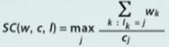
Оптимальные затраты системы:

Цена анархии - отношение затрат системы к оптимальным затратам.


#### Модель статической динамики

1.5001


##### Модель Бэкмана

2.3326


In [12]:
#with open(beckmann_save + 'anaheim_result_' + 'fwm_t_weighted' + '_max_iter_' + str(max_iter) + '_beckmann.pickle', 'wb') as f:
#    pickle.dump(result, f)

In [11]:
with open('anaheim_result_fwm.pickle', 'rb') as f:
    result2 = pickle.load(f)

In [26]:
len(result2['flows'])

914

In [33]:
with open('result3') as f:
    result3 = []
    for line in f: # read rest of lines
        result3 = result3 + [float(x) for x in line.split()]

In [46]:
with open('result4') as f:
    result4 = []
    for line in f: # read rest of lines
        result4 = result4 + [float(x) for x in line.split()]

In [ ]:
result3

In [69]:
answer = {}
result = {}
answer['flows'] = result2['flows']
result['flows'] = result3
delta = abs(answer['flows'] - result['flows'])
print('Flows:')
print('total_od_flow =', total_od_flow)
print('min_i |f - f^*|[i] =', np.min(delta))
print('max_i |f - f^*|[i] =', np.max(delta))
print('||f - f^*||_1 / ||f^*||_1 =', np.linalg.norm(result['flows'] - answer['flows'], ord = 1) / np.linalg.norm(answer['flows'], ord = 1))
print('||f - f^*||_2 / ||f^*||_2 =', np.linalg.norm(delta) / np.linalg.norm(answer['flows']))
# print('Times:')
# delta = abs(answer['times'] - result['times'])
# print('min_i |t - t^*|[i] =', np.min(delta))
# print('max_i |t - t^*|[i] =', np.max(delta))
# print('||t - t^*||_1 =', np.sum(delta))

Flows:
total_od_flow = 104694.4
min_i |f - f^*|[i] = 0.0
max_i |f - f^*|[i] = 2108.7616508609135
||f - f^*||_1 / ||f^*||_1 = 0.15095973037944047
||f - f^*||_2 / ||f^*||_2 = 0.15344656934803577


## И, наконец, приведём наглядное представление разницы между моделями со штрафами и без
### В данном случае сравнивается распределение поток для города Анахайм
### Как видно, существенное перераспределение потоков приходит примерно на 20% всех ребёр

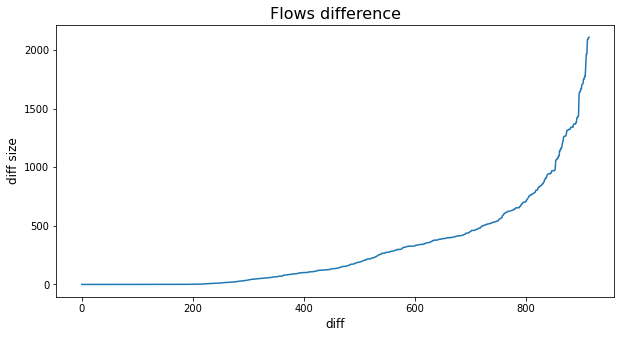

In [70]:
sort_dif = sorted(delta)
iters = [x + 100.0 / len(sort_dif) for x in range(0, len(sort_dif))]

plt.figure(figsize = (10, 5))
plt.plot(iters, sort_dif)
plt.title('Flows difference', fontsize = 16)
plt.ylabel('diff size', fontsize = 12)
plt.xlabel('diff', fontsize = 12)
# plt.yscale('log')
plt.show()

## Далее приведём такое же сравнение для времени по рёбрам

In [45]:
def get_real_time(t, free_flow, f, capacity):
    return [(t[i] - 4*((f[i]/capacity[i])**4)) for i in range(len(capacity))]

In [ ]:
graph_data['graph_table']['capacity'].tolist()

In [55]:
real_time = get_real_time(result4, graph_data['graph_table']['free_flow_time'].tolist(), result3, graph_data['graph_table']['capacity'].tolist())

In [56]:
print(real_time[:10])

[-0.1484212589972158, -3.300643610368107, -0.626551546557367, -10.208258597240704, 1.0687070379148957, 0.16819361129659716, -0.19306507480185142, 0.9989605288456331, 0.9764193117294881, 0.9992673070547415]


In [60]:
answer = {}
result = {}
result['flows'] = result2['times']
answer['flows'] = real_time
delta = answer['flows'] - result['flows']
print('Flows:')
print('total_od_flow =', total_od_flow)
print('min_i |f - f^*|[i] =', np.min(delta))
print('max_i |f - f^*|[i] =', np.max(delta))
print('||f - f^*||_1 / ||f^*||_1 =', np.linalg.norm(result['flows'] - answer['flows'], ord = 1) / np.linalg.norm(answer['flows'], ord = 1))
print('||f - f^*||_2 / ||f^*||_2 =', np.linalg.norm(delta) / np.linalg.norm(answer['flows']))
# print('Times:')
# delta = abs(answer['times'] - result['times'])
# print('min_i |t - t^*|[i] =', np.min(delta))
# print('max_i |t - t^*|[i] =', np.max(delta))
# print('||t - t^*||_1 =', np.sum(delta))

Flows:
total_od_flow = 104694.4
min_i |f - f^*|[i] = -47.28967618204884
max_i |f - f^*|[i] = 2.7363006718239546e-06
||f - f^*||_1 / ||f^*||_1 = 0.48807183992161635
||f - f^*||_2 / ||f^*||_2 = 1.0010999039347288


In [66]:
new_arr = []
for x in delta:
    if x > 0:
        new_arr.append(x)
print(new_arr)

[2.4589144054232293e-09, 1.6866097407586267e-09, 4.657770391602867e-09, 4.291683675106128e-09, 2.4589144054232293e-09, 1.6866097407586267e-09, 4.291683675106128e-09, 4.657770391602867e-09, 5.000007075040003e-09, 5.000001412902577e-09, 4.945950093926399e-09, 1.9999996103692297e-09, 1.9999969458339706e-09, 1.928587067823173e-09, 2.7145460115285402e-06, 4.711244477872967e-07, 2.7363006718239546e-06]


## Здесь приведено время без штрафов, как видно, нам удалось добиться существенного улучшения на ~5% рёбер

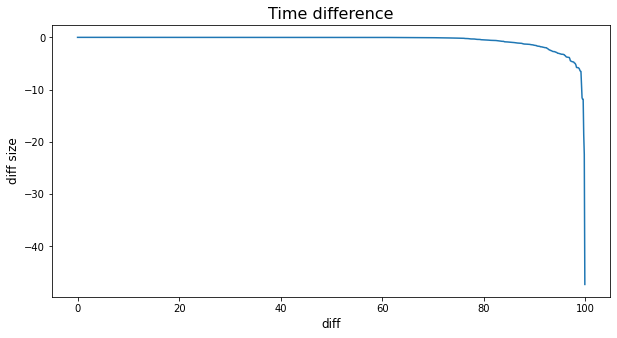

In [64]:
sort_dif = sorted(delta, reverse=True)
iters = [x * 100.0 / len(sort_dif) for x in range(0, len(sort_dif))]

plt.figure(figsize = (10, 5))
plt.plot(iters, sort_dif)
plt.title('Time difference', fontsize = 16)
plt.ylabel('diff size', fontsize = 12)
plt.xlabel('diff', fontsize = 12)
# plt.yscale('log')
plt.show()

## Далее сами расчёты модели бэкмана на разных численных методах

## Frank-Wolfe method

In [50]:
#new prox oracle etc. t_weighted !!
assert(model.mu == 0.25)
max_iter = 10000

print('Frank-Wolfe without stopping criteria')
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose' : True, 'verbose_step': 2000, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'fwm', solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
time_ratio_calc = result['times'] / graph_data['graph_table']['free_flow_time']
time_ratio = [0. if graph_data['graph_table']['free_flow_time'][i] == 0 else time_ratio_calc[i]  for i in range(len(time_ratio_calc))]
print('Time ratio =', np.max(time_ratio))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

Frank-Wolfe without stopping criteria
Oracles created...
Frank-Wolfe method...
Primal_init = 468014
Dual_init = -180000
Duality_gap_init = 288014

Iterations number: 2000
Primal_func_value = 336354
Dual_func_value = -336110
Duality_gap = 243.621
Duality_gap / Duality_gap_init = 0.000845863

Iterations number: 4000
Primal_func_value = 336354
Dual_func_value = -336231
Duality_gap = 122.672
Duality_gap / Duality_gap_init = 0.000425923

Iterations number: 6000
Primal_func_value = 336354
Dual_func_value = -336272
Duality_gap = 81.7274
Duality_gap / Duality_gap_init = 0.000283761

Iterations number: 8000
Primal_func_value = 336354
Dual_func_value = -336292
Duality_gap = 61.3799
Duality_gap / Duality_gap_init = 0.000213114

Iterations number: 10000
Primal_func_value = 336354
Dual_func_value = -336305
Duality_gap = 49.1612
Duality_gap / Duality_gap_init = 0.00017069

Result: success
Total iters: 10000
Primal_func_value = 336354
Dual_func_value = -336305
Duality_gap = 49.1612
Duality_gap / Dual

In [7]:
epsilons = np.logspace(3,-0.5,8)
epsilons

array([1.00000000e+03, 3.16227766e+02, 1.00000000e+02, 3.16227766e+01,
       1.00000000e+01, 3.16227766e+00, 1.00000000e+00, 3.16227766e-01])

## Universal Similar Triangles

In [33]:
assert(model.mu == 0.25)
max_iter = 10000
for index, eps_abs in enumerate(epsilons):
    print('eps_abs =', eps_abs)
    solver_kwargs = {'eps_abs': eps_abs,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap',
                     'verbose' : True, 'verbose_step': 2000, 'save_history' : True}
    tic = time.time()
    result = model.find_equilibrium(solver_name = 'ustm', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    time_ratio_calc = result['times'] / graph_data['graph_table']['free_flow_time']
    time_ratio = [0. if graph_data['graph_table']['free_flow_time'][i] == 0 else time_ratio_calc[i]  for i in range(len(time_ratio_calc))]
    print('Time ratio =', np.max(time_ratio))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

    result['eps_abs'] = eps_abs
    result['elapsed_time'] = toc - tic
    print(result['flows'])
    print(result['times'])
    print(result['zone travel times'])
    #with open(beckmann_save + 'anaheim_result_' + 'ustm' + '_eps_abs_' + str(index) + '_beckmann.pickle', 'wb') as f:
    #    pickle.dump(result, f)

eps_abs = 1000.0
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 181912
Dual_init = -112500
Duality_gap_init = 69411.6

Result: success
Total iters: 42
Primal_func_value = 137234
Dual_func_value = -136236
Duality_gap = 997.222
Duality_gap / Duality_gap_init = 0.0143668
Oracle elapsed time: 0 sec
Elapsed time: 0 sec
Time ratio = 1.5219884917190531
Flow excess = 0.014924586538730189

[1500.         1500.          529.84917308  970.15082692 2029.84917308
 3000.        ]
[ 0.          0.         15.45000086 61.11856279 45.65965475  0.        ]
{(1, 3): 45.659654751571594, (2, 3): 61.10965561524162}
eps_abs = 562.341325190349
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 181912
Dual_init = -112500
Duality_gap_init = 69411.6


/content/oracles.py:277: RuntimeWarning: invalid value encountered in true_divide
  (self.rho * self.freeflowtimes)) ** self.mu
/content/oracles.py:320: RuntimeWarning: divide by zero encountered in true_divide
  x_0_arr = [0.0 if math.isnan(x) or x == float("inf") or x == float("-inf") else x for x in (point_new - self.freeflowtimes) / (self.rho * self.freeflowtimes)]
/content/oracles.py:321: RuntimeWarning: divide by zero encountered in true_divide
  a_arr = [0.0 if math.isnan(x) or x == float("inf") or x == float("-inf") else x for x in self.capacities / (A * self.rho * self.freeflowtimes)]



Result: success
Total iters: 105
Primal_func_value = 137033
Dual_func_value = -136482
Duality_gap = 550.836
Duality_gap / Duality_gap_init = 0.00793579
Oracle elapsed time: 0 sec
Elapsed time: 0 sec
Time ratio = 1.5432702488685404
Flow excess = 2.220446049250313e-16

[1500.         1500.          492.45826352 1007.54173648 1992.45826352
 3000.        ]
[ 0.          0.         15.30422697 61.60276334 46.29810747  0.        ]
{(1, 3): 46.29810746605621, (2, 3): 61.60233443927362}
eps_abs = 316.22776601683796
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 181912
Dual_init = -112500
Duality_gap_init = 69411.6

Result: success
Total iters: 244
Primal_func_value = 136939
Dual_func_value = -136625
Duality_gap = 313.339
Duality_gap / Duality_gap_init = 0.00451421
Oracle elapsed time: 1 sec
Elapsed time: 1 sec
Time ratio = 1.560190926666416
Flow excess = 8.881784197001252e-16

[1500.         1500.          466.09240232 1033.90759768 1966.09240

In [30]:
print(result['flows'])
print(result['times'])
print(result['zone travel times'])

[1500.         1500.          437.76152451 1062.23847549 1937.76152451
 3000.        ]
[ 0.          0.         15.11219957 62.73377446 47.62152943  0.        ]
{(1, 3): 47.621529429496384, (2, 3): 62.73372900062961}


In [37]:
result

{'elapsed_time': 0.034216880798339844,
 'eps_abs': 0.31622776601683794,
 'flows': array([  -0., 1500., 1500.]),
 'history': {'dual_func': [-135000.0,
   -135248.25110870868,
   -135466.02434456238,
   -135702.5344705929,
   -135918.42784421518,
   -136082.25324570923,
   -136185.39150936913,
   -136240.05589988895,
   -136265.1537035697,
   -136275.4655658565,
   -136279.36511617134,
   -136280.7512233133,
   -136281.22125097766],
  'dual_gap': [1281.4453125,
   1033.194203791354,
   815.4209679376218,
   578.9108419071126,
   363.01746828481555,
   199.19206679076888,
   96.05380313086789,
   41.38941261105356,
   16.291608930332586,
   5.979746643541148,
   2.080196328694001,
   0.6940891866979655,
   0.22406152237090282],
  'inner_iters': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'primal_func': [136281.4453125,
   136281.44531250003,
   136281.4453125,
   136281.4453125,
   136281.4453125,
   136281.4453125,
   136281.4453125

In [38]:
assert(model.mu == 0.25)
max_iter = 40000
for index, eps_abs in enumerate(epsilons):
    if index < len(epsilons) - 1:
        continue
    print('eps_abs =', eps_abs)
    solver_kwargs = {'eps_abs': eps_abs,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap',
                     'verbose' : True, 'verbose_step': 4000, 'save_history' : True}
    tic = time.time()
    result = model.find_equilibrium(solver_name = 'ustm', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    time_ratio_calc = result['times'] / graph_data['graph_table']['free_flow_time']
    time_ratio = [0. if graph_data['graph_table']['free_flow_time'][i] == 0 else time_ratio_calc[i]  for i in range(len(time_ratio_calc))]
    print('Time ratio =', np.max(time_ratio))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

    result['eps_abs'] = eps_abs
    result['elapsed_time'] = toc - tic
    #with open(beckmann_save + 'anaheim_result_' + 'ustm' + '_eps_abs_' + str(index) + '_beckmann.pickle', 'wb') as f:
    #    pickle.dump(result, f)

eps_abs = 0.31622776601683794
Composite optimization...
Oracles created...
Universal similar triangles method...
Primal_init = 136281
Dual_init = -135000
Duality_gap_init = 1281.45

Result: success
Total iters: 12
Primal_func_value = 136281
Dual_func_value = -136281
Duality_gap = 0.224062
Duality_gap / Duality_gap_init = 0.000174851
Oracle elapsed time: 0 sec
Elapsed time: 0 sec
Time ratio = 1.046955106505654
Flow excess = -0.2499999999999999



In [39]:
result

{'elapsed_time': 0.024740934371948242,
 'eps_abs': 0.31622776601683794,
 'flows': array([  -0., 1500., 1500.]),
 'history': {'dual_func': [-135000.0,
   -135248.25110870868,
   -135466.02434456238,
   -135702.5344705929,
   -135918.42784421518,
   -136082.25324570923,
   -136185.39150936913,
   -136240.05589988895,
   -136265.1537035697,
   -136275.4655658565,
   -136279.36511617134,
   -136280.7512233133,
   -136281.22125097766],
  'dual_gap': [1281.4453125,
   1033.194203791354,
   815.4209679376218,
   578.9108419071126,
   363.01746828481555,
   199.19206679076888,
   96.05380313086789,
   41.38941261105356,
   16.291608930332586,
   5.979746643541148,
   2.080196328694001,
   0.6940891866979655,
   0.22406152237090282],
  'inner_iters': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'primal_func': [136281.4453125,
   136281.44531250003,
   136281.4453125,
   136281.4453125,
   136281.4453125,
   136281.4453125,
   136281.4453125

In [ ]:
#index += 8
#epsilons = np.logspace(4, 3, 5)[:-1]
#epsilons

array([10000.        ,  5623.4132519 ,  3162.27766017,  1778.27941004])

## Universal Gradient Descent

In [31]:
epsilons = np.logspace(3,1.5,7)
epsilons

array([1000.        ,  562.34132519,  316.22776602,  177.827941  ,
        100.        ,   56.23413252,   31.6227766 ])

In [34]:
#weighted t added
assert(model.mu == 0.25)
max_iter = 40000
for index, eps_abs in enumerate(epsilons):
    print('eps_abs =', eps_abs)
    solver_kwargs = {'eps_abs': eps_abs,
                     'max_iter': max_iter, 'stop_crit': 'dual_gap',
                     'verbose' : True, 'verbose_step': 4000, 'save_history' : True}
    tic = time.time()
    result = model.find_equilibrium(solver_name = 'ugd', composite = True, solver_kwargs = solver_kwargs)
    toc = time.time()
    print('Elapsed time: {:.0f} sec'.format(toc - tic))
    print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
    print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')
    
    result['eps_abs'] = eps_abs
    result['elapsed_time'] = toc - tic
    print(result['flows'])
    print(result['times'])
    print(result['zone travel times'])
    #with open(beckmann_save + 'anaheim_result_' + 'ugd' + '_eps_abs_' + str(index) + '_beckmann.pickle', 'wb') as f:
    #    pickle.dump(result, f)

eps_abs = 1000.0
Composite optimization...
Oracles created...
Universal gradient descent method...
Primal_init = 181912
Dual_init = -112500
Duality_gap_init = 69411.6


/content/oracles.py:277: RuntimeWarning: invalid value encountered in true_divide
  (self.rho * self.freeflowtimes)) ** self.mu
/content/oracles.py:320: RuntimeWarning: divide by zero encountered in true_divide
  x_0_arr = [0.0 if math.isnan(x) or x == float("inf") or x == float("-inf") else x for x in (point_new - self.freeflowtimes) / (self.rho * self.freeflowtimes)]
/content/oracles.py:321: RuntimeWarning: divide by zero encountered in true_divide
  a_arr = [0.0 if math.isnan(x) or x == float("inf") or x == float("-inf") else x for x in self.capacities / (A * self.rho * self.freeflowtimes)]



Result: success
Total iters: 340
Primal_func_value = 137358
Dual_func_value = -136359
Duality_gap = 998.403
Duality_gap / Duality_gap_init = 0.0143838
Oracle elapsed time: 1 sec
Elapsed time: 2 sec
Time ratio = 1.572683549457219
Flow excess = 0.023841961852848925

[1500.         1500.          547.68392371  952.31607629 2047.68392371
 3000.        ]
[ 0.          0.         15.27189726 62.78494564 47.18050648  0.        ]
{(1, 3): 47.18050648371657, (2, 3): 62.45240374493638}
eps_abs = 562.341325190349
Composite optimization...
Oracles created...
Universal gradient descent method...
Primal_init = 181912
Dual_init = -112500
Duality_gap_init = 69411.6

Result: success
Total iters: 928
Primal_func_value = 137090
Dual_func_value = -136528
Duality_gap = 561.855
Duality_gap / Duality_gap_init = 0.00809454
Oracle elapsed time: 4 sec
Elapsed time: 4 sec
Time ratio = 1.5901602054948145
Flow excess = 0.002326663564457654

[1500.         1500.          504.65332713  995.34667287 2004.65332713
 3

In [16]:
result

{'flows': array([1500.        , 1500.        ,  414.31052895, 1085.68947105,
        1914.31052895, 3000.        ]),
 'history': {'dual_func': [nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   nan,
   

In [ ]:
#index += 7
#epsilons = np.logspace(4, 3, 5)[:-1]
#epsilons

array([10000.        ,  5623.4132519 ,  3162.27766017,  1778.27941004])

## Weighted Dual Averages

### Composite optimization

In [ ]:
assert(model.mu == 0.25)
max_iter = 40000
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose': True, 'verbose_step': 4000, 'save_history': True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'wda', composite = True, solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

result['elapsed_time'] = toc - tic
#with open(beckmann_save + 'anaheim_result_' + 'wda' + '_max_iter_' + str(max_iter) + '_beckmann.pickle', 'wb') as f:
#    pickle.dump(result, f)

Composite optimization...
Oracles created...
Weighted dual averages method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 4000
Inner iterations number: 0
Primal_func_value = 1.28604e+06
Dual_func_value = -1.28602e+06
Duality_gap = 18.1014
Duality_gap / Duality_gap_init = 0.000377636

Iterations number: 8000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28602e+06
Duality_gap = 9.47457
Duality_gap / Duality_gap_init = 0.000197661

Iterations number: 12000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 6.45904
Duality_gap / Duality_gap_init = 0.00013475

Iterations number: 16000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06
Duality_gap = 4.91314
Duality_gap / Duality_gap_init = 0.000102499

Iterations number: 20000
Inner iterations number: 0
Primal_func_value = 1.28603e+06
Dual_func_value = -1.28603e+06

### Non-composite optimization

In [ ]:
assert(model.mu == 0.25)
max_iter = 40000
solver_kwargs = {'max_iter' : max_iter, 'stop_crit': 'max_iter',
                 'verbose': True, 'verbose_step': 4000, 'save_history' : True}
tic = time.time()
result = model.find_equilibrium(solver_name = 'wda', composite = False, solver_kwargs = solver_kwargs)
toc = time.time()
print('Elapsed time: {:.0f} sec'.format(toc - tic))
print('Time ratio =', np.max(result['times'] / graph_data['graph_table']['free_flow_time']))
print('Flow excess =', np.max(result['flows'] / graph_data['graph_table']['capacity']) - 1, end = '\n\n')

result['elapsed_time'] = toc - tic
#with open(beckmann_save + 'anaheim_result_' + 'wda_noncomposite' + '_max_iter_' + str(max_iter) + '_beckmann.pickle', 'wb') as f:
#    pickle.dump(result, f)

Non-composite optimization...
Oracles created...
Weighted dual averages method...
Primal_init = 1.29606e+06
Dual_init = -1.24813e+06
Duality_gap_init = 47933.4

Iterations number: 4000
Inner iterations number: 0
Primal_func_value = 1.2868e+06
Dual_func_value = -1.28265e+06
Duality_gap = 4156.14
Duality_gap / Duality_gap_init = 0.0867066

Iterations number: 8000
Inner iterations number: 0
Primal_func_value = 1.28641e+06
Dual_func_value = -1.28391e+06
Duality_gap = 2495.95
Duality_gap / Duality_gap_init = 0.0520713

Iterations number: 12000
Inner iterations number: 0
Primal_func_value = 1.28628e+06
Dual_func_value = -1.2844e+06
Duality_gap = 1884.2
Duality_gap / Duality_gap_init = 0.0393086

Iterations number: 16000
Inner iterations number: 0
Primal_func_value = 1.28622e+06
Dual_func_value = -1.28466e+06
Duality_gap = 1558.96
Duality_gap / Duality_gap_init = 0.0325234

Iterations number: 20000
Inner iterations number: 0
Primal_func_value = 1.28619e+06
Dual_func_value = -1.28484e+06
Duali

## Plots

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import pickle
import numpy as np
beckmann_save = 'beckmann_results/'

In [ ]:
results = {}

for method in ['ustm', 'ugd']:
    results[method] = {}
    results[method]['iters'] = []
    results[method]['inner_iters'] = []
    results[method]['epsilon'] = []
    results[method]['dual_gap_init'] = []
    i = 0
    while True:
        try:
            with open(beckmann_save + 'anaheim_result_' + method + '_eps_abs_'
                      + str(i) + '_beckmann.pickle', 'rb') as f:
                result = pickle.load(f)
                results[method]['epsilon'].append(result['eps_abs'])
                results[method]['iters'].append(result['iter_num'])
                results[method]['inner_iters'].append(result['history'].get('inner_iters')[-1])
                results[method]['dual_gap_init'].append(result['history'].get('dual_gap')[0])
        except FileNotFoundError:
            break
        i += 1


In [ ]:
for method in ['wda', 'wda_noncomposite']:
    results[method] = {}
    with open(beckmann_save + 'anaheim_result_' + method + '_max_iter_40000_beckmann.pickle', 'rb') as f:
        result = pickle.load(f)
        results[method]['epsilon'] = result['history'].get('dual_gap')
        results[method]['iters'] = result['history'].get('iter')
        results[method]['dual_gap_init'] = result['history'].get('dual_gap')[0]

In [ ]:
method = 'fwm'
with open(beckmann_save + 'anaheim_result_fwm_t_weighted_max_iter_10000_beckmann.pickle', 'rb') as f:
    results[method] = {}
    result = pickle.load(f)
    results[method]['epsilon'] = result['history'].get('dual_gap')
    results[method]['iters'] = result['history'].get('iter')
    results[method]['dual_gap_init'] = result['history'].get('dual_gap')[0]

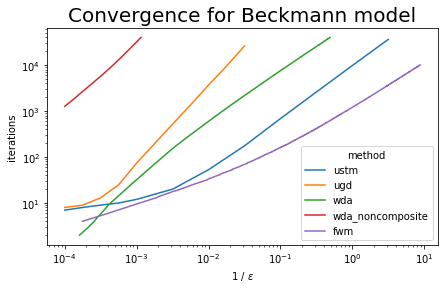

In [ ]:
plt.figure(figsize=(7,4))
plt.title('Convergence for Beckmann model', fontsize=20)
eps_upper = 1e4
for method, data in results.items():
    x = 1. / np.array(data['epsilon'])
    y = np.array(data['iters'])
    ind = np.nonzero(1 / x <= eps_upper)
    plt.plot(x[ind], y[ind], label = method)
plt.legend(title = 'method')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\varepsilon$')
plt.ylabel('iterations')
plt.show()

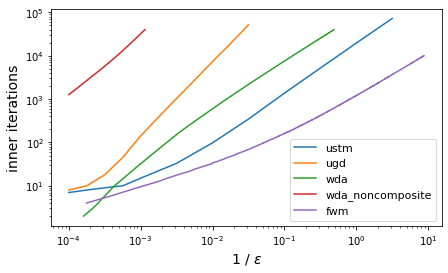

In [ ]:
#inner iterations vs absolute accuracy = eps_abs
plt.figure(figsize=(7,4))
#plt.title('Convergence for Beckmann model', fontsize=20)
eps_upper = 1e4
for method, data in results.items():
    x = 1. / np.array(data['epsilon'])
    if 'inner_iters' in data:
        y = np.array(data['inner_iters'])
    else:
        y = np.array(data['iters'])
    ind = np.nonzero(1 / x <= eps_upper)
    plt.plot(x[ind], y[ind], label = method)
plt.legend(prop = {'size' : 11})
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\varepsilon$', fontsize = 14)
plt.ylabel('inner iterations', fontsize = 14)
#plt.savefig('beckmann_convergence.jpg', dpi = 300)
plt.show()

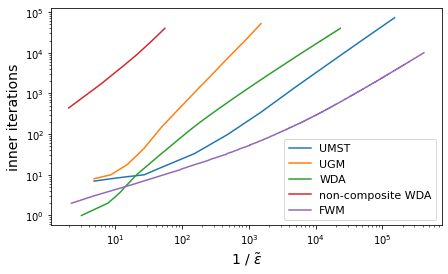

In [ ]:
#inner iterations vs relative accuracy = eps_abs / dual_gap_init
plt.figure(figsize=(7,4))
#plt.title('Convergence for Beckmann model', fontsize=20)
eps_upper = 0.5

method_names = {'ustm' : 'UMST', 'ugd' : 'UGM', 'wda' : 'WDA',
                'wda_noncomposite' : 'non-composite WDA', 'fwm' : 'FWM'}
for method, data in results.items():
    x = 1. / (np.array(data['epsilon']) / np.array(data['dual_gap_init']))
    if 'inner_iters' in data:
        y = np.array(data['inner_iters'])
    else:
        y = np.array(data['iters'])
    ind = np.nonzero(1 / x <= eps_upper)
    plt.plot(x[ind], y[ind], label = method_names[method])
plt.legend(prop = {'size' : 11})
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'1 / $\tilde\varepsilon$', fontsize = 14)
plt.ylabel('inner iterations', fontsize = 14)
#plt.savefig('beckmann_convergence_rel_eps.jpg', dpi = 300)
plt.show()